In [55]:
# Preparing data for training
import numpy as np
import os

# Reading data into a list where each element is one line (string)
input_texts = []
target_texts = []
data_path = 'sample_en-fr.txt'

with open(data_path, 'r', encoding='utf-8') as f:
    for line in f:
        input_texts.append(line.rstrip('\n'))
# input_texts now contains each line as a string
print(f'Read {len(input_texts)} lines from {data_path}')

Read 54 lines from sample_en-fr.txt


In [56]:
input_texts

['hello<EOS>bonjour<EOS>',
 'how are you<EOS>comment ça va<EOS>',
 'i am a student<EOS>je suis étudiant<EOS>',
 'thank you<EOS>merci<EOS>',
 'good morning<EOS>bon matin<EOS>',
 'my friend<EOS>mon ami<EOS>',
 'what is your name<EOS>quel est votre nom<EOS>',
 'i speak english<EOS>je parle anglais<EOS>',
 'do you speak french<EOS>parlez vous français<EOS>',
 'nice to meet you<EOS>enchanté de vous rencontrer<EOS>',
 "where are you from<EOS>d'où venez vous<EOS>",
 "i love paris<EOS>j'aime paris<EOS>",
 'can i help you<EOS>puis je vous aider<EOS>',
 'how much does it cost<EOS>combien ça coûte<EOS>',
 'i am sorry<EOS>je suis désolé<EOS>',
 'see you later<EOS>à bientôt<EOS>',
 'the weather is nice<EOS>le temps est beau<EOS>',
 "i like this book<EOS>j'aime ce livre<EOS>",
 'have you eaten<EOS>avez vous mangé<EOS>',
 "excuse me please<EOS>excusez moi s'il vous plaît<EOS>",
 'what time is it<EOS>quelle heure est il<EOS>',
 'i am happy<EOS>je suis heureux<EOS>',
 "this is delicious<EOS>c'est délic

In [57]:
eng_texts = [] # Encoder input texts
fra_texts = [] # Decoder target texts also, decoder input texts for teacher forcing

for line in input_texts:
    eng, fra, _ = line.split("<EOS>")
    eng_texts.append(eng)
    fra_texts.append(fra)
eng_texts

['hello',
 'how are you',
 'i am a student',
 'thank you',
 'good morning',
 'my friend',
 'what is your name',
 'i speak english',
 'do you speak french',
 'nice to meet you',
 'where are you from',
 'i love paris',
 'can i help you',
 'how much does it cost',
 'i am sorry',
 'see you later',
 'the weather is nice',
 'i like this book',
 'have you eaten',
 'excuse me please',
 'what time is it',
 'i am happy',
 'this is delicious',
 'would you like tea',
 'i need help',
 'good night',
 'where is the bathroom',
 'i am hungry',
 'do you like music',
 'my name is john',
 'can you help me',
 'how old are you',
 'i love you',
 'what is this',
 'this is beautiful',
 'do you have time',
 'i am tired',
 "let's go",
 'good bye',
 'welcome',
 "it's cold today",
 'i understand',
 "i don't understand",
 'please speak slowly',
 'can i sit here',
 'what is the price',
 'i am from america',
 'do you have children',
 'this tastes good',
 'how are you',
 'i am a student',
 'thank you',
 'good morning'

In [58]:
fra_texts

['bonjour',
 'comment ça va',
 'je suis étudiant',
 'merci',
 'bon matin',
 'mon ami',
 'quel est votre nom',
 'je parle anglais',
 'parlez vous français',
 'enchanté de vous rencontrer',
 "d'où venez vous",
 "j'aime paris",
 'puis je vous aider',
 'combien ça coûte',
 'je suis désolé',
 'à bientôt',
 'le temps est beau',
 "j'aime ce livre",
 'avez vous mangé',
 "excusez moi s'il vous plaît",
 'quelle heure est il',
 'je suis heureux',
 "c'est délicieux",
 'voulez vous du thé',
 "j'ai besoin d'aide",
 'bonne nuit',
 'où est la salle de bains',
 "j'ai faim",
 'aimez vous la musique',
 'mon nom est john',
 "pouvez vous m'aider",
 'quel âge avez vous',
 "je t'aime",
 "qu'est ce que c'est",
 "c'est magnifique",
 'avez vous du temps',
 'je suis fatigué',
 'allons y',
 'au revoir',
 'bienvenue',
 "il fait froid aujourd'hui",
 'je comprends',
 'je ne comprends pas',
 "parlez lentement s'il vous plaît",
 "puis je m'asseoir ici",
 'quel est le prix',
 "je viens d'amérique",
 'avez vous des enfa

In [59]:
# Adding start and end tokens to target texts

encoder_texts = eng_texts
decoder_texts = []

for fra in fra_texts:
    decoder_texts.append("\t" + fra + "\n") # \t is the "start sequence" token, \n is "end sequence" token
decoder_texts

['\tbonjour\n',
 '\tcomment ça va\n',
 '\tje suis étudiant\n',
 '\tmerci\n',
 '\tbon matin\n',
 '\tmon ami\n',
 '\tquel est votre nom\n',
 '\tje parle anglais\n',
 '\tparlez vous français\n',
 '\tenchanté de vous rencontrer\n',
 "\td'où venez vous\n",
 "\tj'aime paris\n",
 '\tpuis je vous aider\n',
 '\tcombien ça coûte\n',
 '\tje suis désolé\n',
 '\tà bientôt\n',
 '\tle temps est beau\n',
 "\tj'aime ce livre\n",
 '\tavez vous mangé\n',
 "\texcusez moi s'il vous plaît\n",
 '\tquelle heure est il\n',
 '\tje suis heureux\n',
 "\tc'est délicieux\n",
 '\tvoulez vous du thé\n',
 "\tj'ai besoin d'aide\n",
 '\tbonne nuit\n',
 '\toù est la salle de bains\n',
 "\tj'ai faim\n",
 '\taimez vous la musique\n',
 '\tmon nom est john\n',
 "\tpouvez vous m'aider\n",
 '\tquel âge avez vous\n',
 "\tje t'aime\n",
 "\tqu'est ce que c'est\n",
 "\tc'est magnifique\n",
 '\tavez vous du temps\n',
 '\tje suis fatigué\n',
 '\tallons y\n',
 '\tau revoir\n',
 '\tbienvenue\n',
 "\til fait froid aujourd'hui\n",
 '\tj

In [60]:
# Building character vocabularies for the encoder and decoder

input_chars = set()
target_chars = set()

for text in encoder_texts:
    for char in text:
        input_chars.add(char)

for text in decoder_texts:
    for char in text:
        target_chars.add(char)

input_chars = sorted(list(input_chars))
target_chars = sorted(list(target_chars))

# All these numbers are for the model srchitectire for input shapes
num_encoder_tokens = len(input_chars)
num_decoder_tokens = len(target_chars)
max_encoder_seq_length = max([len(txt) for txt in encoder_texts])
max_decoder_seq_length = max([len(txt) for txt in decoder_texts])  

In [61]:
# Character to index mapping

input_token_index = {char: i for i, char in enumerate(input_chars)}
target_token_index = {char: i for i, char in enumerate(target_chars)}


In [62]:
# Initializing the tensors for the inputs

num_samples = len(encoder_texts)

# Encoder input data
encoder_input_data = np.zeros(
    (num_samples, max_encoder_seq_length, num_encoder_tokens),
    dtype="float32"
)

# Decoder input data
decoder_input_data = np.zeros(
    (num_samples, max_decoder_seq_length, num_decoder_tokens),
    dtype="float32"
)

# Decoder target data which is basically one timestep ahead of decoder_input_data for teacher forcing
decoder_target_data = np.zeros(
    (num_samples, max_decoder_seq_length, num_decoder_tokens),
    dtype="float32"
)


In [63]:
# Filling the tensors with one-hot encoded vectors

for i, (enc_text, dec_text) in enumerate(zip(encoder_texts, decoder_texts)):
    # Encoder input
    for t, char in enumerate(enc_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0

    # Decoder input and target
    for t, char in enumerate(dec_text):
        decoder_input_data[i, t, target_token_index[char]] = 1.0

        if t > 0:
            # Decoder target is shifted by one timestep
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0


In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if device.type == 'cpu':
    print("I no get GPU :(")

# Convert numpy data to PyTorch tensors
encoder_input_data_torch = torch.FloatTensor(encoder_input_data).to(device)
decoder_input_data_torch = torch.FloatTensor(decoder_input_data).to(device)
decoder_target_data_torch = torch.FloatTensor(decoder_target_data).to(device)

latent_dim = 64  # Latent dimensionality of the encoding space.

# Define Encoder with 2 LSTM layers
class Encoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(Encoder, self).__init__()
        self.lstm1 = nn.LSTM(input_size, latent_dim, batch_first=True)
        self.lstm2 = nn.LSTM(latent_dim, latent_dim, batch_first=True)
    
    def forward(self, x):
        # First LSTM layer
        out1, (h1, c1) = self.lstm1(x)
        # Second LSTM layer
        out2, (h2, c2) = self.lstm2(out1)
        # Return hidden and cell states from the second layer
        return h2, c2

# Define Decoder with 2 LSTM layers
class Decoder(nn.Module):
    def __init__(self, output_size, latent_dim):
        super(Decoder, self).__init__()
        self.lstm1 = nn.LSTM(output_size, latent_dim, batch_first=True)
        self.lstm2 = nn.LSTM(latent_dim, latent_dim, batch_first=True)
        self.dense = nn.Linear(latent_dim, output_size)
    
    def forward(self, x, hidden1, cell1, hidden2, cell2):
        # First LSTM layer
        out1, (h1, c1) = self.lstm1(x, (hidden1, cell1))
        # Second LSTM layer
        out2, (h2, c2) = self.lstm2(out1, (hidden2, cell2))
        # Output layer with softmax
        output = torch.softmax(self.dense(out2), dim=-1)
        return output, h1, c1, h2, c2

# Define the full Seq2Seq model
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, encoder_input, decoder_input):
        # Encode the input sequence
        encoder_h, encoder_c = self.encoder(encoder_input)
        # For 2-layer LSTM, we need states for both layers
        # Here we use the encoder states for both decoder layers
        decoder_output, _, _, _, _ = self.decoder(decoder_input, encoder_h, encoder_c, encoder_h, encoder_c)
        return decoder_output

# Instantiate the models
encoder = Encoder(num_encoder_tokens, latent_dim).to(device)
decoder = Decoder(num_decoder_tokens, latent_dim).to(device)
model = Seq2Seq(encoder, decoder).to(device)

Using device: cpu
I no get GPU :(


In [78]:
# Training 
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)

epochs = 700
batch_size = 5 
num_batches = len(encoder_input_data_torch) // batch_size
loss_list = []

for epoch in range(epochs):
    total_loss = 0
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = start_idx + batch_size
        
        encoder_batch = encoder_input_data_torch[start_idx:end_idx]
        decoder_batch = decoder_input_data_torch[start_idx:end_idx]
        target_batch = decoder_target_data_torch[start_idx:end_idx]
        
        optimizer.zero_grad()
        
        # Forward pass
        output = model(encoder_batch, decoder_batch)
        
        # Reshape for loss calculation
        # output: (batch_size, seq_length, num_decoder_tokens)
        # target_batch: (batch_size, seq_length, num_decoder_tokens)
        output_reshaped = output.view(-1, num_decoder_tokens)
        target_reshaped = target_batch.view(-1, num_decoder_tokens)
        
        # Loss calculation
        loss = criterion(output_reshaped, target_reshaped)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    loss_list.append(total_loss / num_batches)
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / num_batches:.4f}")

print("Done")


Epoch 50/700, Loss: 1.3734
Epoch 100/700, Loss: 1.3716
Epoch 150/700, Loss: 1.3692
Epoch 200/700, Loss: 1.3658
Epoch 250/700, Loss: 1.3646
Epoch 300/700, Loss: 1.3646
Epoch 350/700, Loss: 1.3623
Epoch 400/700, Loss: 1.3617
Epoch 450/700, Loss: 1.3594
Epoch 500/700, Loss: 1.3582
Epoch 550/700, Loss: 1.3559
Epoch 600/700, Loss: 1.3547
Epoch 650/700, Loss: 1.3536
Epoch 700/700, Loss: 1.3529
Done


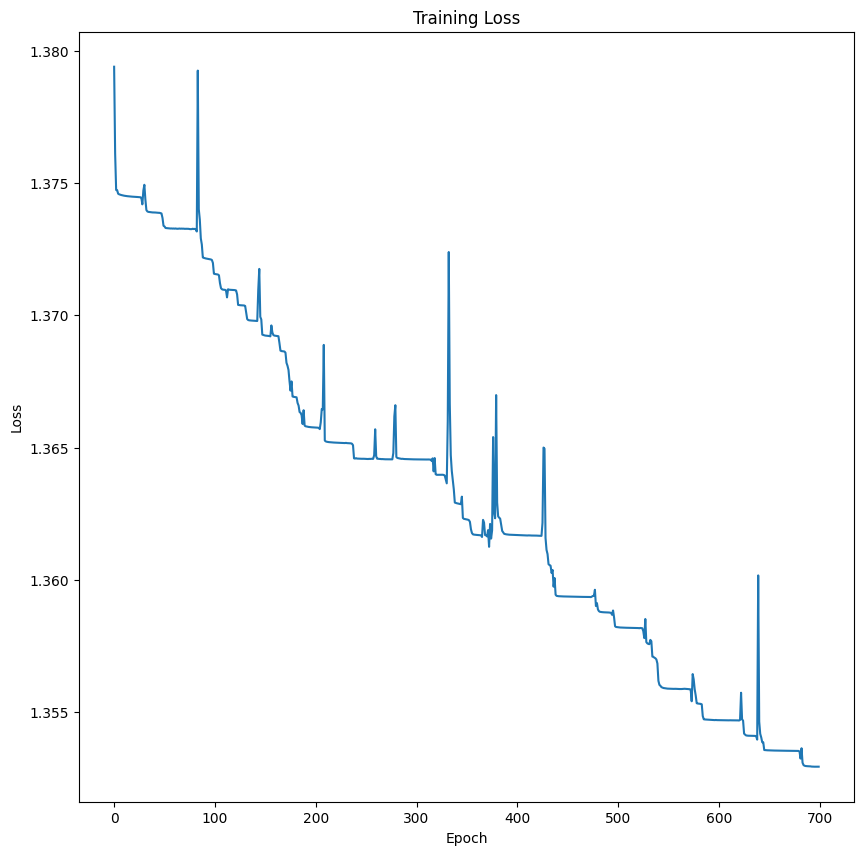

In [80]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [81]:
reverse_target_char_index = {
    i: char for char, i in target_token_index.items()
}

In [82]:
# Set models to evaluation mode
encoder.eval()
decoder.eval()

# Define inference encoder model (returns context from encoder)
class EncoderInference(nn.Module):
    def __init__(self, encoder):
        super(EncoderInference, self).__init__()
        self.encoder = encoder
    
    def forward(self, x):
        h, c = self.encoder(x)
        return h, c

# Define inference decoder model (takes one timestep at a time)
class DecoderInference(nn.Module):
    def __init__(self, decoder):
        super(DecoderInference, self).__init__()
        self.decoder = decoder
    
    def forward(self, x, h1, c1, h2, c2):
        output, h1_new, c1_new, h2_new, c2_new = self.decoder.forward(x, h1, c1, h2, c2)
        return output, h1_new, c1_new, h2_new, c2_new

encoder_inference = EncoderInference(encoder).to(device)
decoder_inference = DecoderInference(decoder).to(device)


In [83]:
def decode_sequence(input_seq):
    # Encode the input sequence
    input_tensor = torch.FloatTensor(input_seq).to(device)
    
    with torch.no_grad():
        h2, c2 = encoder_inference(input_tensor)
        h1, c1 = h2, c2  # Initialize first layer states same as encoder output
    
    # Generate empty target sequence of length 1.
    target_seq = torch.zeros(1, 1, num_decoder_tokens).to(device)
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.0
    
    # Sampling loop
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        with torch.no_grad():
            output, h1, c1, h2, c2 = decoder_inference(target_seq, h1, c1, h2, c2)
        
        # Sample a token
        sampled_token_index = torch.argmax(output[0, -1, :]).item()
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char
        
        # Exit condition: either hit max length or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
        
        # Update the target sequence (of length 1).
        target_seq = torch.zeros(1, 1, num_decoder_tokens).to(device)
        target_seq[0, 0, sampled_token_index] = 1.0
    
    return decoded_sentence


In [84]:
def encode_input_sentence(sentence):
    # Initialize empty encoder input
    sentence = sentence.lower() # convert to lowercase
    encoder_input = np.zeros(
        (1, max_encoder_seq_length, num_encoder_tokens),
        dtype="float32"
    )

    for t, char in enumerate(sentence):
        if char in input_token_index:
            encoder_input[0, t, input_token_index[char]] = 1.0
        # else: silently ignore unknown characters

    return encoder_input


In [86]:
english_input = "i don't understand"
input_seq = encode_input_sentence(english_input)

french = decode_sequence(input_seq)
print(french)


je suis étudiant

